# **Music Genre Classification Project**
---

In [1]:
import numpy as np
import pandas as pd
import os
import tarfile
import urllib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **Get Data**

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
music = train_data.copy()

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/music_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/music_test.csv')
music = train_data.copy()

In [4]:
music.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [5]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [6]:
music.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [3]:
music=music.drop('Id',axis=1)

In [4]:
music=music.drop(['Artist Name','Track Name'] ,axis=1)

In [5]:
# Filter all the rows that have duration value less than "30"
music.loc[(music['duration_in min/ms'] < 30)]['duration_in min/ms']

6        3.893933
10       4.347117
14       3.863867
18       5.227267
19       3.398883
           ...   
14370    6.357333
14371    4.347200
14375    2.213000
14380    2.642450
14395    2.614567
Name: duration_in min/ms, Length: 2075, dtype: float64

In [6]:
condition = music['duration_in min/ms'] < 30

# If the value in duration_in_min/ms column is less than 30, then multiply the value with 60,000
music.loc[condition,'duration_in min/ms'] = music.loc[condition,'duration_in min/ms']*60000
music["duration_in min/ms"]=music["duration_in min/ms"]/1000
music.rename(columns={"duration_in min/ms": "duration_in_s"},inplace=True)

In [11]:
music.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_s,time_signature,Class
0,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204.947,4,9
1,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191.956,4,6
2,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161.037,4,10
3,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298.093,3,2
4,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254.145,4,5


In [12]:
# music['energy_per_minute']=music['energy']/(music['duration_in min/ms']/1000)
# music['energy_per_minute'].hist(bins=50)

array([[<Axes: title={'center': 'Popularity'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'duration_in_s'}>,
        <Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

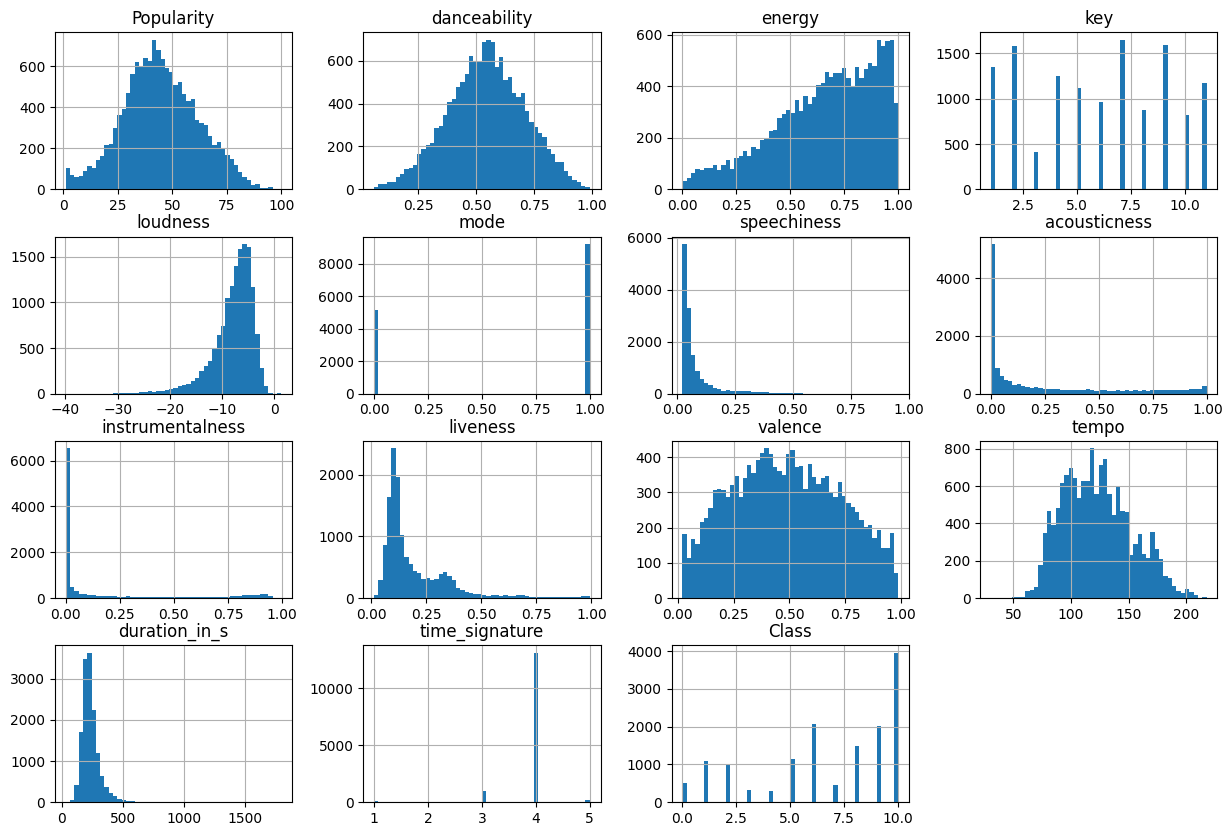

In [13]:
music.hist(bins=50, figsize=(15,10) )

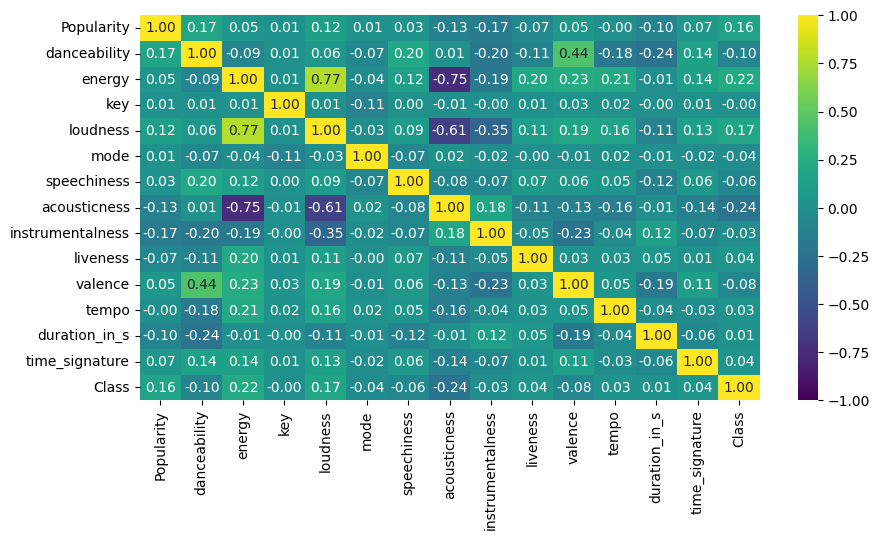

In [15]:
corr=music.corr()
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='viridis',fmt='.2f')

In [16]:
sns.pairplot(data=music,hue='Class',diag_kind='hist',palette='rocket_r')

In [ ]:
# from pandas.plotting import scatter_matrix
# attributes = ["danceability", "valence", "speechiness", "energy","Class","acousticness","loudness"]
# scatter_matrix(music[attributes], figsize=(12,8))

In [ ]:
# music.plot(kind="scatter", x="energy", y="loudness",alpha=0.1, grid=True)
# plt.show()

<Axes: >

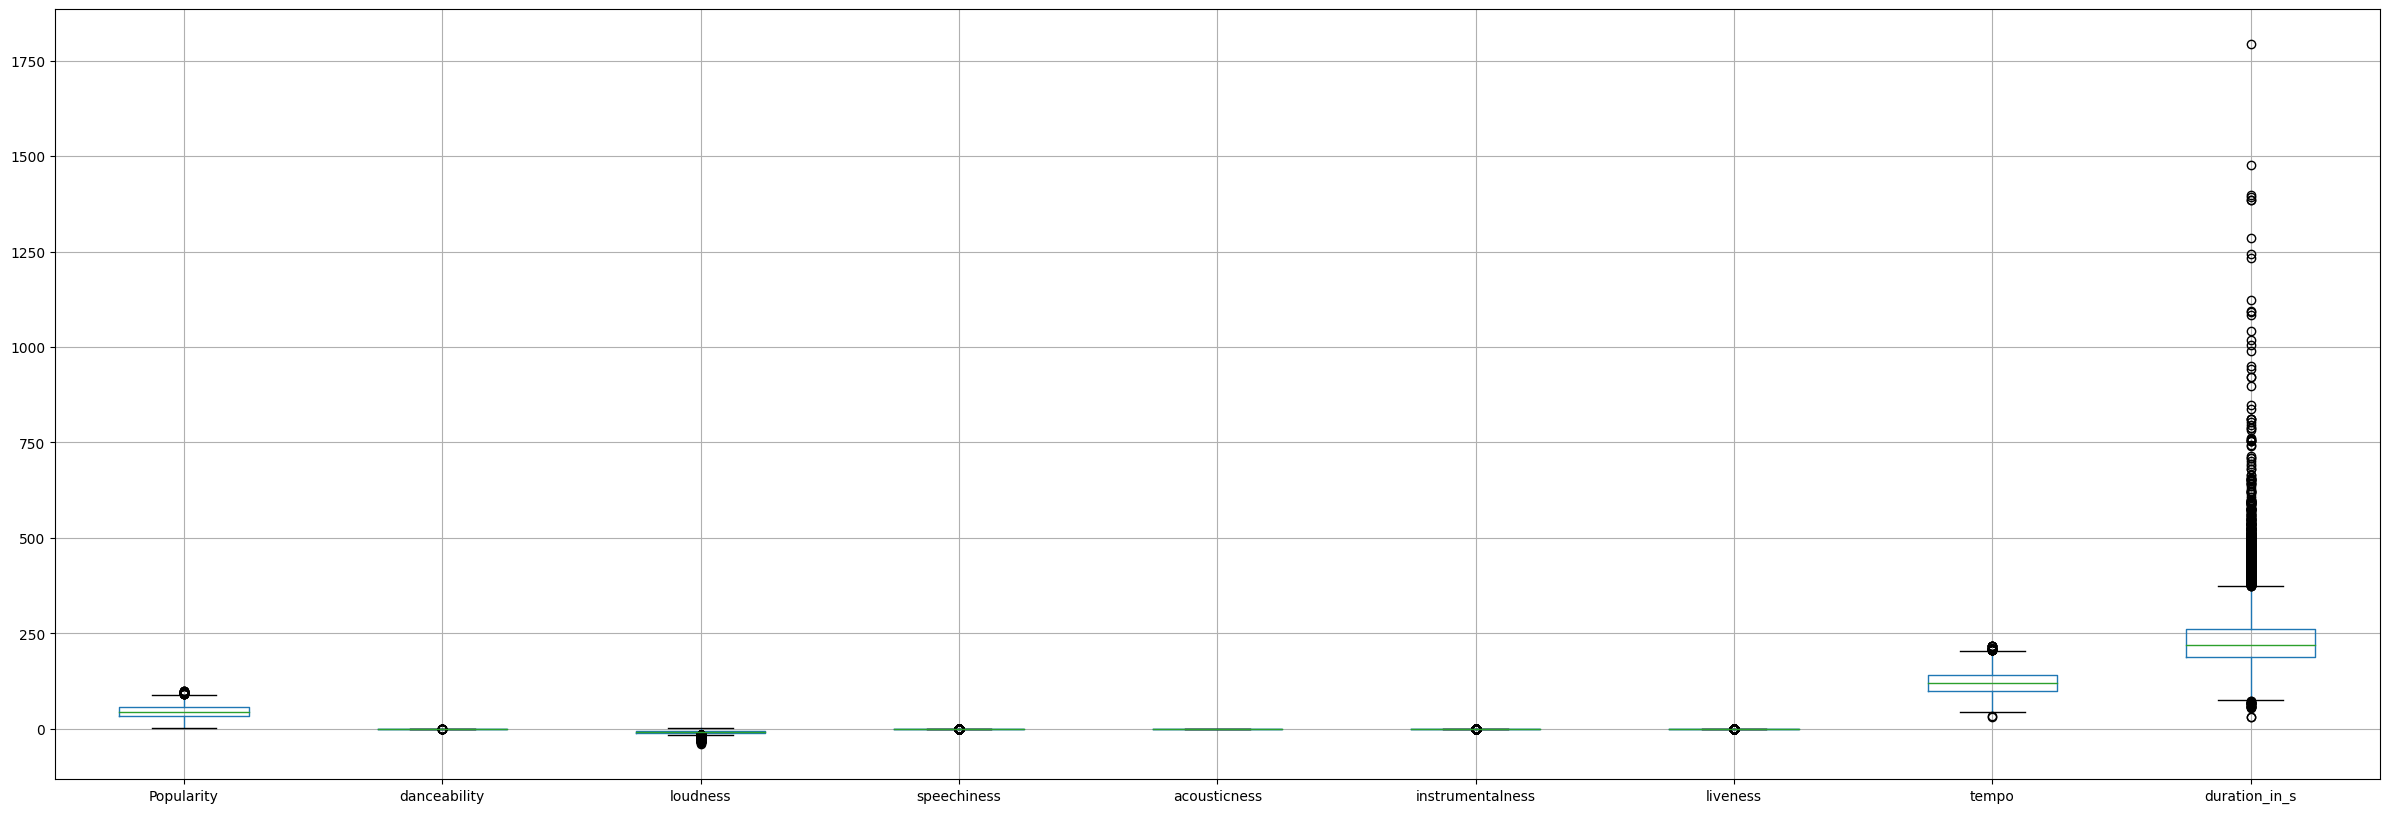

In [20]:
plt.rcParams['figure.figsize'] = 30, 10
attributes = ["Popularity","danceability", "loudness","speechiness","acousticness","instrumentalness","liveness","tempo","duration_in_s"]
music[attributes].select_dtypes(include=np.number).boxplot()

<Axes: xlabel='Class', ylabel='count'>

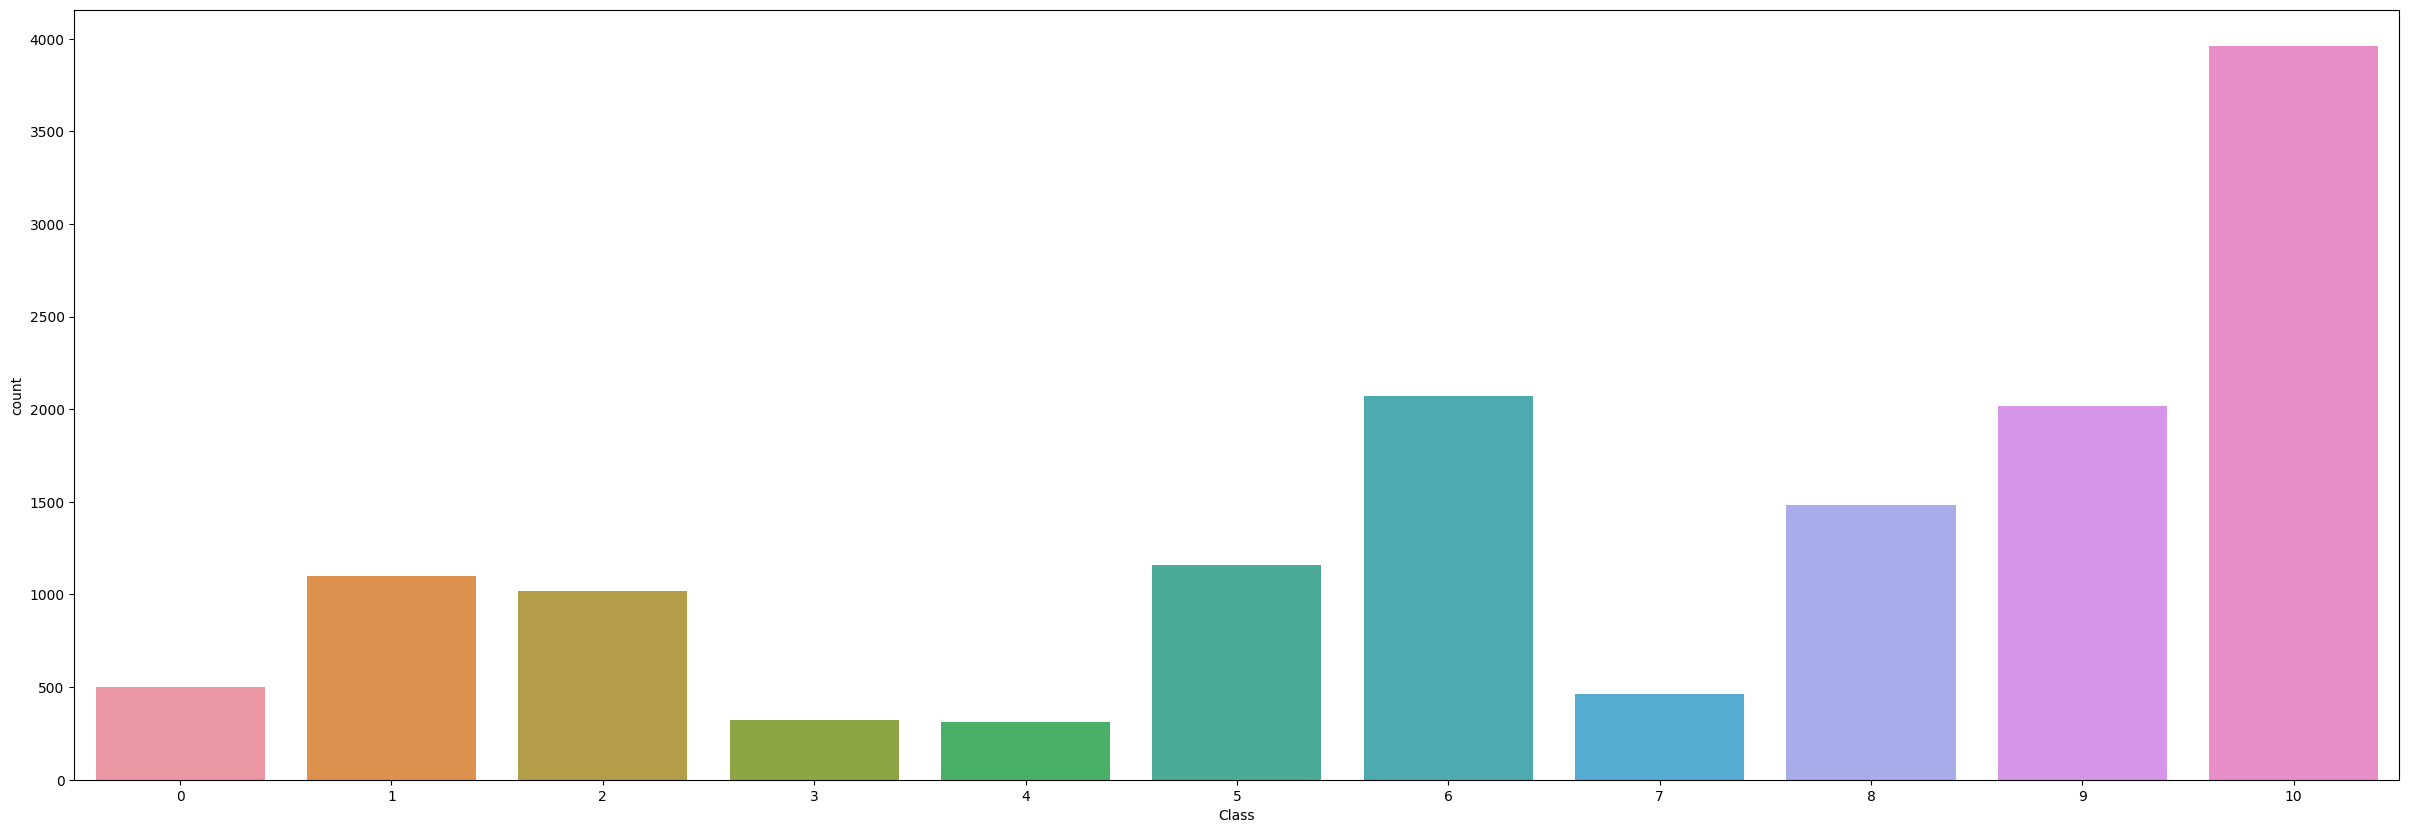

In [21]:
sns.countplot(x='Class',data=music)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [8]:
music.isna().sum()

Popularity           333
danceability           0
energy                 0
key                 1609
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness    3541
liveness               0
valence                0
tempo                  0
duration_in_s          0
time_signature         0
Class                  0
dtype: int64

In [29]:
features_set1 = ['Popularity', 'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in_s', 'time_signature']
features_set1_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan,strategy='median')),
    ('scaler', MinMaxScaler())])

features_set2 = ['key']
features_set2_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan,strategy='constant', fill_value=-1)),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('set1', features_set1_transformer, features_set1),
        ('set2', features_set2_transformer, features_set2)])

In [30]:
features = music.drop('Class' , axis=1)
print(features.columns)

Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in_s', 'time_signature'],
      dtype='object')


In [31]:
labels=music['Class']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20,
                                                    random_state=42,stratify= labels)

In [34]:
from sklearn.linear_model import LogisticRegression

In [30]:
X_train

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_s,time_signature
12498,24.0,0.692,0.301,2.0,-14.094,0,0.0403,0.938000,0.000014,0.1100,0.713,92.059,172.042,4
11872,39.0,0.541,0.392,7.0,-10.635,1,0.0445,0.539000,0.000056,0.0864,0.351,152.993,225.999,4
11842,84.0,0.654,0.630,10.0,-4.644,1,0.0259,0.153000,NaN,0.1110,0.430,89.991,167.693,4
3341,51.0,0.533,0.982,10.0,-1.409,0,0.0910,0.014900,NaN,0.1070,0.627,142.276,182.667,4
8592,30.0,0.492,0.884,1.0,-11.061,0,0.0909,0.000653,0.000011,0.3170,0.149,135.073,297.165,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,33.0,0.448,0.585,1.0,-12.226,1,0.0284,0.000604,0.546000,0.0632,0.399,84.994,235.727,4
7156,43.0,0.604,0.441,5.0,-9.474,1,0.0352,0.791000,NaN,0.2490,0.795,128.320,155.973,4
534,66.0,0.608,0.885,2.0,-4.296,0,0.0963,0.002580,0.000013,0.3920,0.518,125.023,226.760,4
13145,44.0,0.633,0.885,11.0,-2.626,0,0.1440,0.029400,NaN,0.3390,0.394,92.075,142.640,4


In [35]:
prep_train_data = preprocessor.fit_transform(X_train)

In [36]:
prep_train_data

array([[ 0.23232323,  0.68043899,  0.30015319, ...,  0.08050941,
         0.75      , -0.85971084],
       [ 0.38383838,  0.51796858,  0.39126343, ...,  0.11111357,
         0.75      ,  0.48239279],
       [ 0.83838384,  0.6395524 ,  0.62955176, ...,  0.07804268,
         0.75      ,  1.28765496],
       ...,
       [ 0.65656566,  0.5900581 ,  0.88486068, ...,  0.1115452 ,
         0.75      , -0.85971084],
       [ 0.43434343,  0.61695718,  0.88486068, ...,  0.06383273,
         0.75      ,  1.55607569],
       [ 0.18181818,  0.2005595 ,  0.60452147, ...,  0.24950243,
         1.        ,  0.48239279]])

In [33]:
logistic_model = LogisticRegression()
logistic_model.fit(prep_train_data, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
preb_test = preprocessor.transform(X_test)

In [38]:
predictions = logistic_model.predict(preb_test)

NameError: name 'logistic_model' is not defined

In [36]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [37]:
display_scores(predictions)

Scores: [10  9  8 ...  6  9  0]
Mean: 8.06875
Standard deviation: 2.5924829569245857


In [38]:
from sklearn.metrics import classification_report , f1_score

In [39]:
test_data_copy =test_data.copy()

In [40]:
test_data_copy=test_data_copy.drop(['Id','Artist Name','Track Name'], axis=1)

In [41]:
condition = test_data_copy['duration_in min/ms'] < 30

# If the value in duration_in_min/ms column is less than 30, then multiply the value with 60,000
test_data_copy.loc[condition,'duration_in min/ms'] = test_data_copy.loc[condition,'duration_in min/ms']*60000
test_data_copy["duration_in min/ms"]=test_data_copy["duration_in min/ms"]/1000
test_data_copy.rename(columns={"duration_in min/ms": "duration_in_s"},inplace=True)

In [42]:
preb_test_data=preprocessor.transform(test_data_copy)

In [25]:
test_predict=logistic_model.predict(preb_test_data)

NameError: name 'logistic_model' is not defined

In [45]:
submission = test_data[["Id"]]
submission['Class']=test_predict
submission.to_csv("logesticRegression.csv" ,index = None)

<ipython-input-45-1787fb9285d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Class']=test_predict


## DecisionTree

In [98]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [99]:
tree.fit(prep_train_data,y_train)

DecisionTreeClassifier()

In [100]:
predictions=tree.predict(preb_test)

In [101]:
test_predict=tree.predict(preb_test_data)

In [102]:
submission = test_data[["Id"]]
submission['Class']=test_predict
submission.to_csv("DecisionTree.csv" ,index = None)

<ipython-input-102-67af56d7c365>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Class']=test_predict


## RandomForest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
random_forest = RandomForestClassifier()

In [45]:
random_forest.fit(prep_train_data , y_train)

RandomForestClassifier()

In [46]:
predictions=random_forest.predict(preb_test)

In [47]:
test_predict=random_forest.predict(preb_test_data)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV , StratifiedKFold
from sklearn.metrics import classification_report

In [49]:
param_grid = {
    'n_estimators': [20, 30, 40, 60],       # Number of trees in the forest
    'max_depth': [5, 10, 15, 20],               # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                  # Minimum number of samples required to split an internal node
    'max_features': ['sqrt', 'log2']            # Number of features to consider at each split
}

In [50]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [51]:
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=cv, scoring='f1_macro', verbose=1, n_jobs=-1)
grid_search.fit(prep_train_data, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 30, 40, 60]},
             scoring='f1_macro', verbose=1)

In [53]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [54]:
best_params

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 60}

In [55]:
y_pred = best_model.predict(preb_test)
y_pred_test= best_model.predict(preb_test_data)

In [56]:
submission = test_data[["Id"]]
submission['Class']=y_pred_test
submission.to_csv("RandomForestWithGrid.csv" ,index = None)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10052\3400306059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Class']=y_pred_test


In [112]:
submission = test_data[["Id"]]
submission['Class']=test_predict
submission.to_csv("RandomForest.csv" ,index = None)

<ipython-input-112-e04f4092a276>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Class']=test_predict


## Support Vector Machines

In [ ]:
from sklearn.svm import SVC
svm = SVC()

In [ ]:
svm.fit(prep_train_data,y_train)

SVC()

In [ ]:
predictions=svm.predict(preb_test)

In [ ]:
test_predict=svm.predict(preb_test_data)

In [ ]:
submission = test_data[["Id"]]
submission['Class']=test_predict
submission.to_csv("svm.csv" ,index = None)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_2192\1450000104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Class']=test_predict


## Naive Bayes:

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()


In [ ]:
naive_bayes.fit(prep_train_data, y_train)

GaussianNB()

In [ ]:
predictions=naive_bayes.predict(preb_test)

In [ ]:
test_predict=naive_bayes.predict(preb_test_data)

In [ ]:
submission = test_data[["Id"]]
submission['Class']=test_predict
submission.to_csv("naive_bayes.csv" ,index = None)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_2192\3271327385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Class']=test_predict


## **XGBoost**

In [61]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model= XGBClassifier(n_estimators=101,random_state=42,learning_rate=0.1)
model.fit(prep_train_data, y_train)
xg_predictions = model.predict(preb_test)

In [62]:
xg_pred_test= model.predict(preb_test_data)

In [63]:
submission = test_data[["Id"]]
submission['Class']=xg_pred_test
submission.to_csv("XGBoost.csv" ,index = None)

<ipython-input-63-21008bd526cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Class']=xg_pred_test


In [58]:
from catboost import CatBoostClassifier

ModuleNotFoundError: No module named 'catboost'